# Baisc ROOT Notebook Example

This is a simple ROOT-based Jupyter notebook to demonstrate some very simple/basic ROOT commands.

This notebook uses the Python kernel, so by default you're in a more Python-based environment. Note that we will use some of ROOT's `%%cpp` magics to make things C++ style inside the Python environment.

Also, note that this is a _Markdown_ cell in the notebook. You can of course put comments in the code blocks too, but this is a nice way to add a little bit more sophiscticated documentation.

## Basic Python Setup

First, we need to do some basic setup for Python. To use PyROOT, we still need to import it:

In [1]:
#import ROOT into python
import ROOT

Welcome to JupyROOT 6.12/06


## Hello World

Unfortunately, we are forced by convention to do a simple "Hello World" programming first. Let's do that in Python first:

In [2]:
#some very simple python first.

print 'Hello World'

myname = 'Wes'
print 'Hello %s!' % myname

Hello World
Hello Wes!


OK, simple. Now, ROOT kernels allow us to execute C/C++ code in the same notebook. We just need to begin the cell with the "magic" command `%%cpp`. That tells Jupyter to interpret the cell as C++ and use ROOT's ACLiC compiler to process it. So, doing the same thing now, but in C++:

In [3]:
%%cpp

//very simple again, but now C++

std::cout << "Hello World" << std::endl;

std::string myname_str="Wesley";
std::cout << "Hello " << myname_str << "!" << std::endl;

Hello World
Hello Wesley!


And then, in the very next cell, we can switch back to python.

In [4]:
print 'And...back to python!'

And...back to python!


Note that this is all integrated together. We can print the string we made in C++ in python, it was just done in the "ROOT" environment/module, so we need to specify that.

In [5]:
print 'What was your C++ name? %s' % ROOT.myname_str

What was your C++ name? Wesley


Unfortunately/understandably, it doesn't really work so well the other way for strings. Or I don't know how to do that yet at least. But let's move on.

## Histograms

To show a little bit of actual ROOT, let's make and draw some histograms. We'll do this both in Python (via PyROOT) and in the C++ magics.

In [6]:
#(1) Make a histogram with 100 bins from -5 to 5
#(2) Fill that histogram with 100 data points sampled from a Gaussian distribution
hist_py = ROOT.TH1F("hist_py","My histogram",100,-5,5)
hist_py.FillRandom("gaus",100)

When we draw things in the notebook, we have to be a little more explicit about what we're doing. First, we need to explicitly create the canvas to draw in:

In [7]:
canvas = ROOT.TCanvas("canvas","My canvas")

Then we can draw the histogram, and then draw the canvas. Note: you need to make sure you're in the canvas you want before you draw the histogram (that's true by default if we just created the canvas like we did above, but it's good practice to ensure it by doing the `cd()` command).

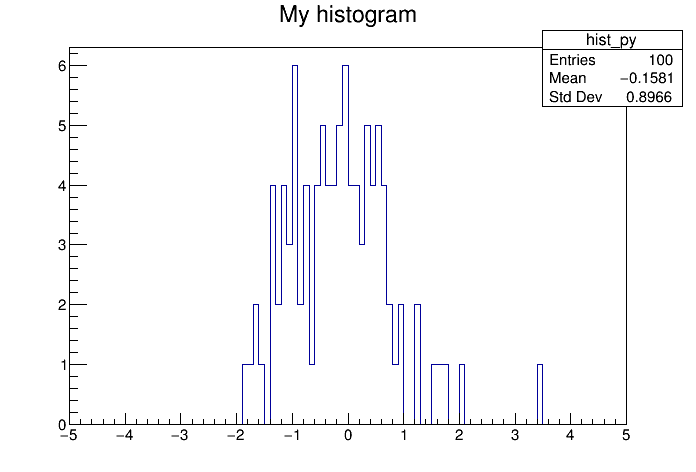

In [8]:
canvas.cd()
hist_py.Draw()
canvas.Draw()

There's a nifty javascript utility that can be enabled to allow you to be more interactive with your plots. You can enable that per-cell with the `%jsroot on` magic command, or you can enable it globally in python by doing the following:

In [9]:
ROOT.enableJSVis()
canvas.cd()
hist_py.Draw()
canvas.Draw()

Note, we could have just re-executed the cell above where we did the draw, and get the javascript enabled one, but I just did it a second time to show the example better. You can zoom in and out, move the legend, right-click to get a bunch of options, etc.

OK, so now, let's do this in a C++ style. Again, we use the `%%cpp` magic command at the beginning of the cell.

In [10]:
%%cpp
TH1F *hist_cpp = new TH1F("hist_cpp","My other histogram",100,-5,5);
hist_cpp->FillRandom("gaus",100);
hist_cpp->Draw();
canvas->Draw();

Quick notes:
* The canvas we created is still valid in the cpp environment. So we can just draw it!
* The javascript option is still enabled from before, so we get the same plotting environment here.

So, we have two histograms, one made in python and one in C. But, we can plot them together:

In [11]:
%%cpp
hist_cpp->SetLineColor(kRed);
hist_cpp->SetLineWidth(2);
hist_cpp->Draw();
hist_py->SetLineStyle(2);
hist_py->Draw("same");
canvas->Draw();

OK! You can see some additional information/example from https://root.cern.ch/notebooks/HowTos/HowTo_ROOT-Notebooks.html. And, you can move on to some of the other examples. A good next step is the <a href="ROOT_CPP_Kernel_Example.ipynb">ROOT C++ kernel example</a>.